In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Renting price in Algeria

![11](https://fitsmallbusiness.com/wp-content/uploads/2018/04/How-Much-Should-I-Charge-for-Rent-Setting-Rent-Price-.png)

**Today, I'm gonna make some analsyis on Renting price in Algeria (my country). I'm gonna scrap the data from an Algerian website, process it, make some analysis then try to build a machine learning model to predict the Final renting price.**

![](https://pbs.twimg.com/media/EBOcejmXUAASv2Z.jpg)

**Scapped data will be used for learning purpose only, no commercial use!**

# Data Scraping:

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import requests

In [24]:
title=[]
location=[]
size=[]
agence=[]
price=[]
detail=[]

In [23]:
details=soup.find_all('ul',class_="listing-details")

In [25]:
url='https://darjadida.com/annonces/immobilier?q=location+appartement&per_page='
for z in range(1,100):
    html = requests.get(url+str(z))
    soup= BeautifulSoup(html.content,'lxml')
    titles=soup.find_all('h4')
    locations=soup.find_all('a',class_="listing-address popup-gmaps")
    sizes=soup.find_all(class_="listing-details")
    agences=soup.find_all('div',class_="listing-footer")
    prices=soup.find_all('span',class_="listing-price")
    details=soup.find_all('ul',class_="listing-details")
    for i in range(len(details)):
        title.append(titles[i].text)
        location.append(locations[i].text)
        agence.append(agences[i].text)
        price.append(prices[i].text)
        detail.append(details[i].text)
    

In [82]:
data=[title,detail,location,size,agence,price]

In [83]:
dict={'titre':title,'detail':detail,'local':location,'vendeur':agence,'prix':price}

In [84]:
df = pd.DataFrame(dict) 

# Data Cleansing:

In [85]:
df['detail']=df['detail'].str.replace('\n','')
df['detail']=df['detail'].str.strip()

In [86]:
df.loc[df['detail'].str.contains('F1'), 'Type'] = 'F1'
df.loc[df['detail'].str.contains('F2'), 'Type'] = 'F2'
df.loc[df['detail'].str.contains('F3'), 'Type'] = 'F3'
df.loc[df['detail'].str.contains('F4'), 'Type'] = 'F4'
df.loc[df['detail'].str.contains('F5'), 'Type'] = 'F5'
df.loc[df['detail'].str.contains('F6'), 'Type'] = 'F6'

In [87]:
df['Bedrooms']=df['Type'].str[1:2]
df['City']=df['titre'].str[24:]
df['M²']=df['detail'].str[4:8]
df=df.dropna()

In [102]:
df.loc[df['titre'].str.contains('Bejaia'), 'City'] = 'Bejaia'
df.loc[df['titre'].str.contains('Annaba'), 'City'] = 'Annaba'
df.loc[df['titre'].str.contains('Bouira'), 'City'] = 'Bouira'
df.loc[df['titre'].str.contains('Alger'), 'City'] = 'Alger'
df.loc[df['titre'].str.contains('Tizi-ouzou'), 'City'] = 'Tizi-ouzou'
df.loc[df['titre'].str.contains('Constantine'), 'City'] = 'Constantine'


In [115]:
df=df.drop(columns=['titre','detail','Type','size'],axis=1)

In [122]:
df=df.drop(columns='local',axis=1)

In [124]:
df.loc[df['prix'].str.contains('DA'), 'Is there a price?'] = 'Yes'

In [126]:
df=df.dropna()

In [128]:
df=df.drop(columns='Is there a price?',axis=1)

In [132]:
df['Price']=df['prix'].str[:8]

In [134]:
df=df.drop(columns='prix',axis=1)

In [137]:
df['vendeur']=df['vendeur'].str.replace('\n','')
df['vendeur']=df['vendeur'].str.strip()

In [151]:
df['Agency']=df['vendeur'].str[:-10]

In [153]:
df=df.drop(columns='vendeur',axis=1)

In [ ]:
df['M²']=df['M²'].str.replace('M','')
df['Price']=df['Price'].str.replace('D','')
df['Price']=df['Price'].str.strip()
df['Price']=df['Price'].str.replace(' ','')
df['Price']=df['Price'].str.replace('A','')
df['Price']=df['Price'].str.replace('.','')

In [194]:

df['Price']=df['Price'].astype('int')
df['Bedrooms']=df['Bedrooms'].astype('int')

In [200]:
df['M²']=df['M²'].str.strip()
df['M²']=df['M²'].str.replace('tudi','')
df['M²']=df['M²'].str.replace('²','')

In [201]:
df['M²']=df['M²'][df['M²']!=''].astype('int')

In [209]:
df = df[['Bedrooms', 'M²', 'City', 'Agency','Price']]

In [213]:
df['City'].unique()

array(['Alger', 'Tizi-ouzou', 'Bejaia', 'Boumerdes', 'Constantine',
       'Jijel', 'Saida', 'Oran', 'an', 'Annaba', 'Borj-bou-arreridj',
       'Blida', 'Biskra', 'Setif', 'Tipaza', 'Bouira', 'Mostaganem',
       'Sidi-belabbes', 'Oum-elbouaghi', 'El-tarf'], dtype=object)

In [229]:
df = df[df.City != 'an']

In [433]:
plt.style.use('classic')

In [435]:
plt.style.use('Solarize_Light2')


# Exploratory data analysis:

<AxesSubplot:title={'center':'Most expensive cities'}, ylabel='City'>

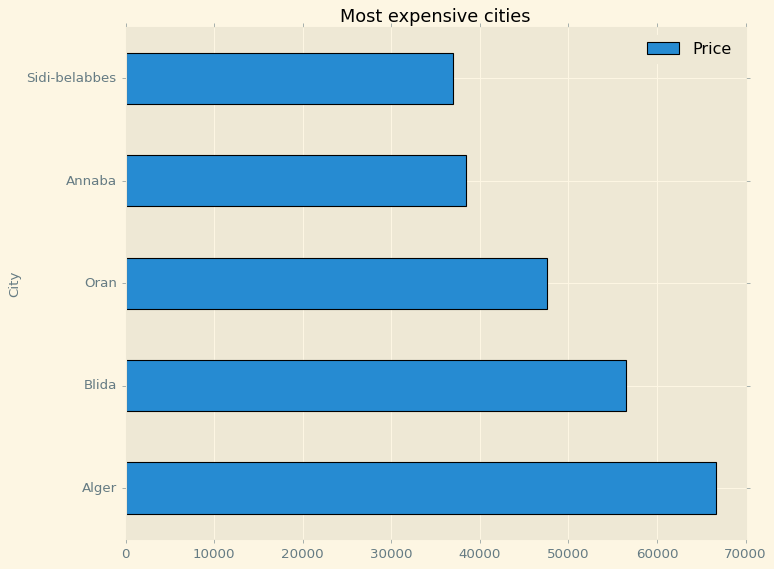

In [451]:
Price_per_city=pd.pivot_table(df,index='City',values='Price')
Price_per_city=Price_per_city.sort_values(by='Price',ascending=False)
Price_per_city=Price_per_city.head(5)
Price_per_city.plot(kind='barh',figsize=(10,8),title='Most expensive cities',edgecolor='black')

**Alger, the capital, has the highest average renting price.**

<AxesSubplot:title={'center':'Price distribution'}, ylabel='Frequency'>

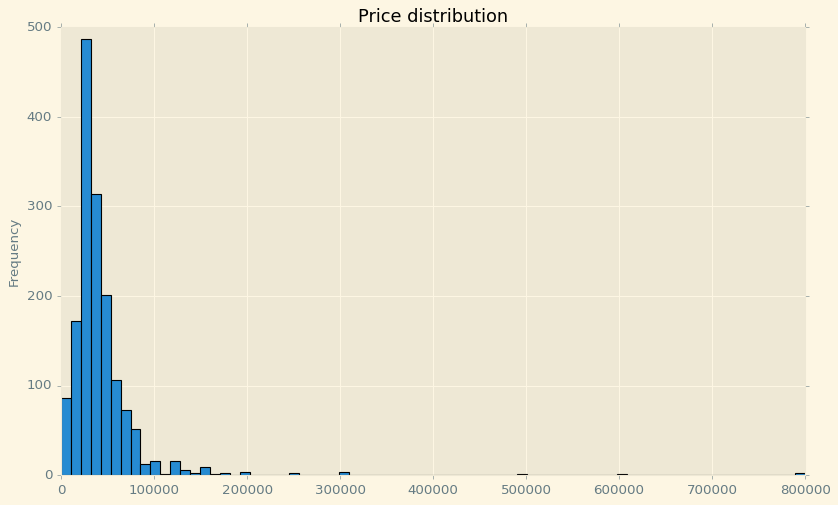

In [490]:
df['Price'].plot(kind='hist',bins=75,figsize=(12,7),edgecolor='black',title='Price distribution')

**Most of renting prices range between 0-100000 DA**


array([<AxesSubplot:ylabel='Price'>], dtype=object)

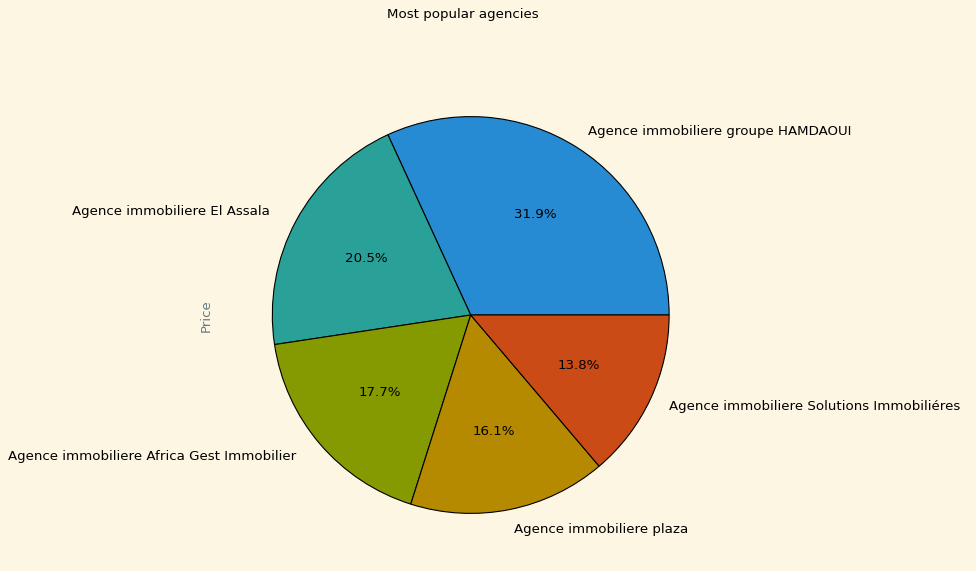

In [455]:
Agencycount=pd.pivot_table(df,index='Agency',values='Price',aggfunc='count')
Agencycount=Agencycount.sort_values(by='Price',ascending=False)
Agencycount=Agencycount[1:].head(5)
Agencycount.plot(kind='pie',figsize=(8,8),subplots=True,autopct='%1.1f%%',title='Most popular agencies',legend=False)

<AxesSubplot:title={'center':'Most expensive Agencies'}, ylabel='Agency'>

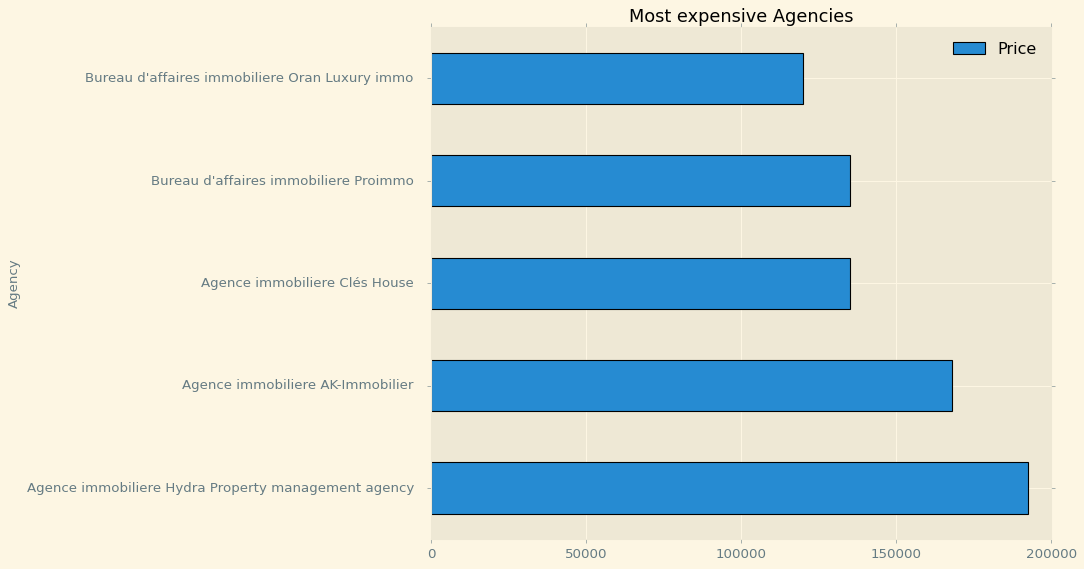

In [452]:
Agencyprice=pd.pivot_table(df,index='Agency',values='Price',aggfunc='mean')
Agencyprice=Agencyprice.sort_values(by='Price',ascending=False)
Agencyprice=Agencyprice.head(5)
Agencyprice.plot(kind='barh',figsize=(10,8),title='Most expensive Agencies',edgecolor='black')

<AxesSubplot:title={'center':'Top 5 cities per count'}, xlabel='City'>

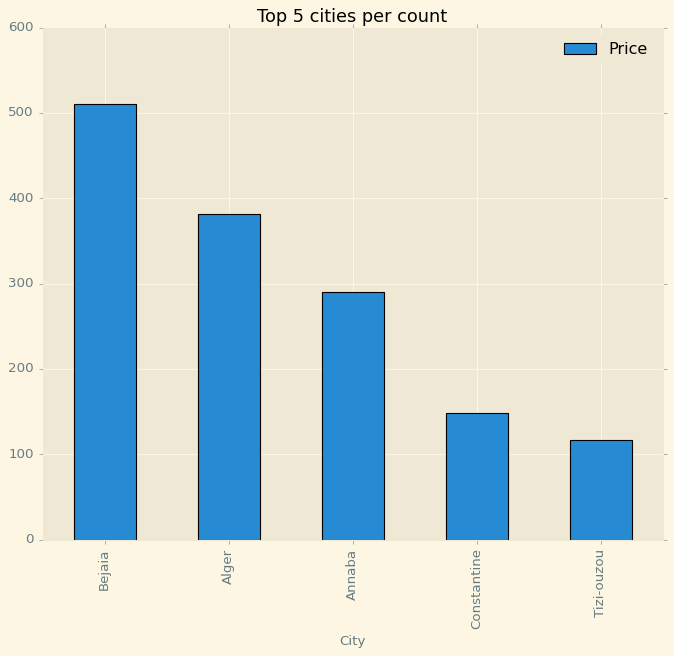

In [453]:
Agencyprice=pd.pivot_table(df,index='City',values='Price',aggfunc='count')
Agencyprice=Agencyprice.sort_values(by='Price',ascending=False)
Agencyprice=Agencyprice.head(5)
Agencyprice.plot(kind='bar',figsize=(10,8),title='Top 5 cities per count',edgecolor='black')

**Bejaia has the highest available appartements.**

<AxesSubplot:title={'center':'Top 5 cities per Area'}, xlabel='City'>

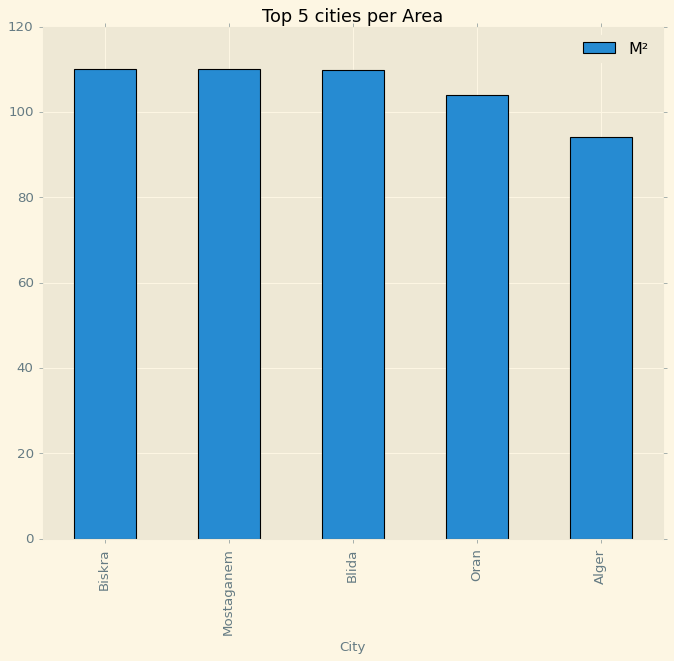

In [489]:
Agencyprice=pd.pivot_table(df,index='City',values='M²',aggfunc='mean')
Agencyprice=Agencyprice.sort_values(by='M²',ascending=False)
Agencyprice=Agencyprice.head(5)
Agencyprice.plot(kind='bar',figsize=(10,8),title='Top 5 cities per Area',edgecolor='black')

**They are almost equal**

<AxesSubplot:title={'center':'Average Price per number of bedrooms'}, xlabel='Bedrooms'>

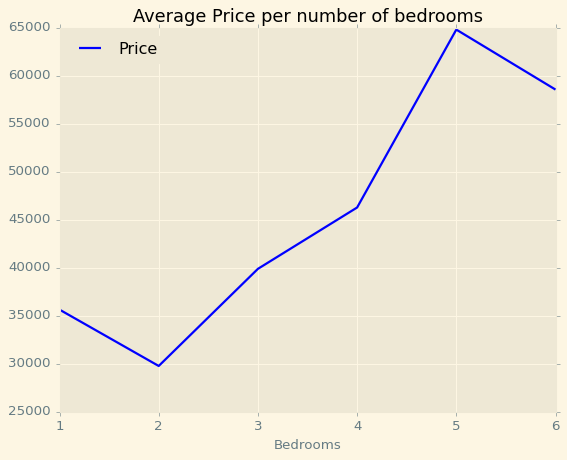

In [465]:
ddd=df[['Bedrooms','Price']].groupby('Bedrooms').mean()
ddd.plot(kind='line',color='b',title='Average Price per number of bedrooms')

**Price will increase with number of bedrooms**

<AxesSubplot:title={'center':'Average Price per M²'}, xlabel='M²'>

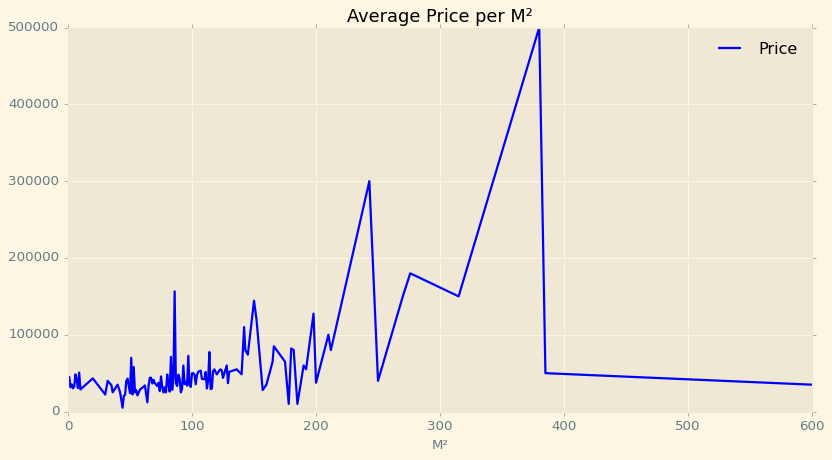

In [483]:
ddd1=df[['M²','Price']].groupby('M²').mean()
ddd1.plot(color='b',title='Average Price per M²',figsize=(12,6))

**In general, Price increase when the area increase**

In [421]:
df2=df.copy()

In [422]:
df2=df2.dropna()

In [423]:
df2['City']=pd.factorize(df2.City)[0]
df2['Agency']=pd.factorize(df2.Agency)[0]
df2['Bedrooms']=pd.factorize(df2.City)[0]

In [424]:
df2['M²']=df2['M²'].fillna(81.17)

In [429]:
df2.head()

,Bedrooms,M²,City,Agency,Price
1,0,80.00,0,0,130000
3,1,157.00,1,1,28000
5,2,65.00,2,0,30000
7,3,120.00,3,2,50000
9,0,89.00,0,3,90000


# Data correlation:

<AxesSubplot:>

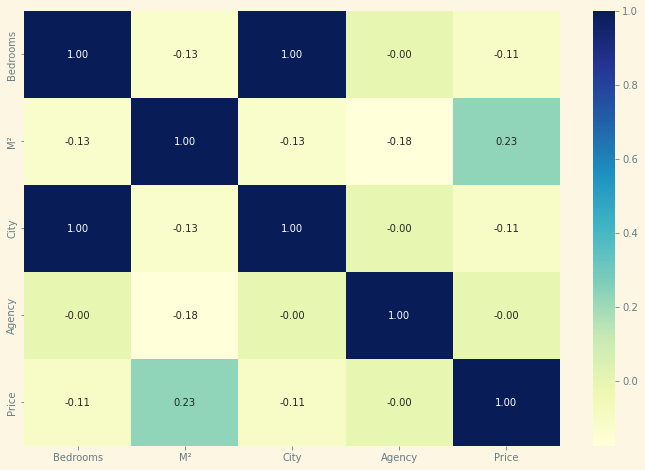

In [428]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot = True, cmap= 'YlGnBu', fmt= '.2f')


**We can see that M², city and number of bedroom has a strong impact on the price**

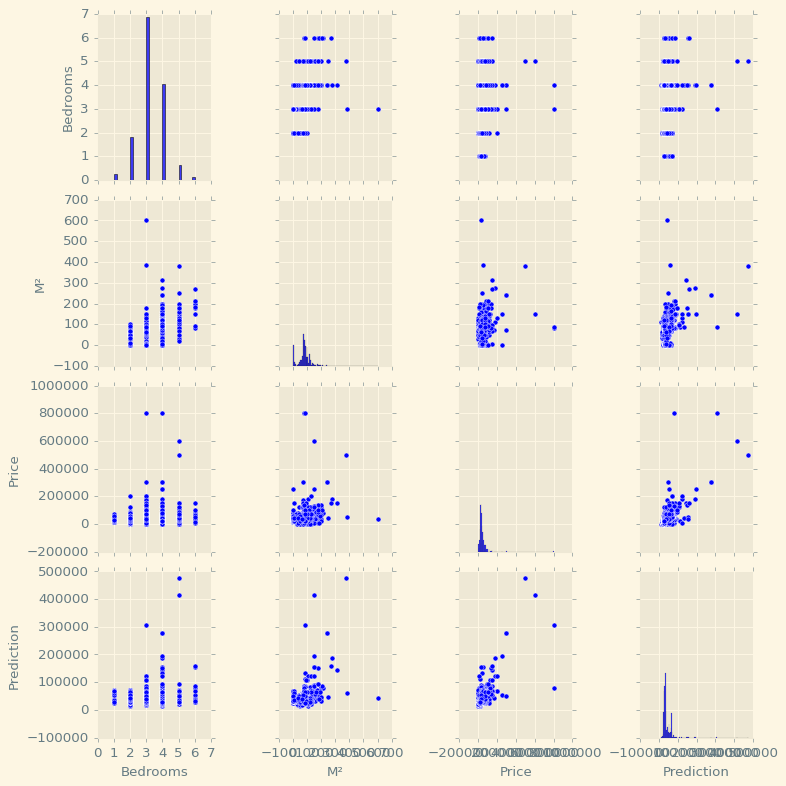

In [448]:
sns.pairplot(df)

# Machine Learning:

In [350]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

In [410]:
X= df2.drop(columns=['Price'],axis=1)
Y= df2['Price']

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 100)

In [399]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()


In [414]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [415]:
score1 = gbr.score(X_train,y_train)
score1

0.4829150843528369

In [416]:
y_pred1 = gbr.predict(X_test)
rscore1=r2_score(y_test, y_pred1)
rscore1

0.41718806361087724

In [431]:
df['Prediction']= gbr.predict(X)

# Price vs Prediction:

In [432]:
df.head()

,Bedrooms,M²,City,Agency,Price,Prediction
1,4,80.00,Alger,Particulier,130000,78569.43
2,3,NaN,Alger,Agence immobiliere plaza,55000,68306.46
3,4,157.00,Tizi-ouzou,Agence immobiliere IMMO VAL; AGREE,28000,37625.84
4,6,NaN,Tizi-ouzou,Agence immobiliere CABINET DE GESTION IMMOBILI...,60000,29915.63
5,3,65.00,Bejaia,Particulier,30000,27534.63


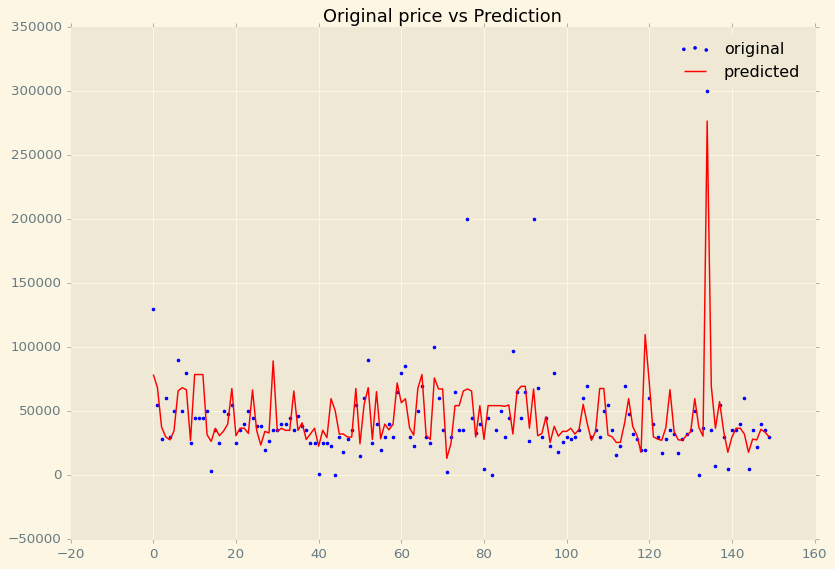

In [488]:
x_ax = range(len(df['Price'].head(150)))
plt.figure(figsize=(12,8))
plt.title('Original price vs Prediction')
plt.scatter(x_ax, df['Price'].head(150), s=5, color="blue", label="original")
plt.plot(x_ax, df['Prediction'].head(150), lw=1.3, color="red", label="predicted")
plt.legend()
plt.show()

**If you like this notebook, then please support it by giving an upvote! more notebooks coming soon!**